In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("../src")  # Adjust this path as needed
from vis import plot_eeg, plot_eeg_with_time
from denoising_methods import *

In [3]:
# Load the data and times from pickle
with open("../data/eeg_data.pkl", "rb") as f:
    eeg_dict = pickle.load(f)

data_df = eeg_dict["data"]
times = eeg_dict["times"]

data_df.head(5)

,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Iz
0,-0.000005,0.000002,0.000037,0.000039,0.000030,0.000026,-0.000016,-0.000014,0.000004,0.000018,...,-0.000021,-0.000008,-0.000035,-0.000045,-0.000066,-0.000039,-0.000033,-0.000048,-0.000039,-0.000039
1,-0.000012,-0.000024,0.000001,-0.000002,-0.000015,-0.000022,-0.000055,-0.000036,-0.000027,-0.000025,...,-0.000050,-0.000040,-0.000068,-0.000065,-0.000084,-0.000052,-0.000021,-0.000042,-0.000031,-0.000034
2,-0.000077,-0.000078,-0.000059,-0.000065,-0.000063,-0.000055,-0.000067,-0.000088,-0.000071,-0.000065,...,-0.000017,-0.000022,-0.000050,-0.000035,-0.000048,-0.000018,-0.000020,-0.000042,-0.000029,-0.000027
3,-0.000066,-0.000067,-0.000050,-0.000065,-0.000060,-0.000055,-0.000068,-0.000062,-0.000053,-0.000054,...,-0.000039,-0.000060,-0.000078,-0.000064,-0.000068,-0.000041,-0.000044,-0.000062,-0.000034,-0.000043
4,-0.000045,-0.000055,-0.000033,-0.000053,-0.000054,-0.000063,-0.000083,-0.000052,-0.000050,-0.000053,...,-0.000044,-0.000055,-0.000070,-0.000054,-0.000063,-0.000037,-0.000060,-0.000070,-0.000034,-0.000045


In [4]:
N_SAMPLES = 1000

In [5]:
chs20_raw_df = data_df.iloc[:N_SAMPLES,:10]
chs20_raw_df.shape

(1000, 10)

In [6]:
chs20_denoised = np.zeros(chs20_raw_df.shape)
for i in range(chs20_raw_df.shape[1]):
    # chs20_denoised[:,i] = denoise_wt(chs20_raw_df.iloc[:,i].to_numpy())
    chs20_denoised[:,i] = denoise(chs20_raw_df.iloc[:,i].to_numpy(), wavelet='db8')
chs20_denoised.shape

(1000, 10)

In [10]:
chs20_denoised_df = pd.DataFrame(chs20_denoised)

NameError: name 'np' is not defined

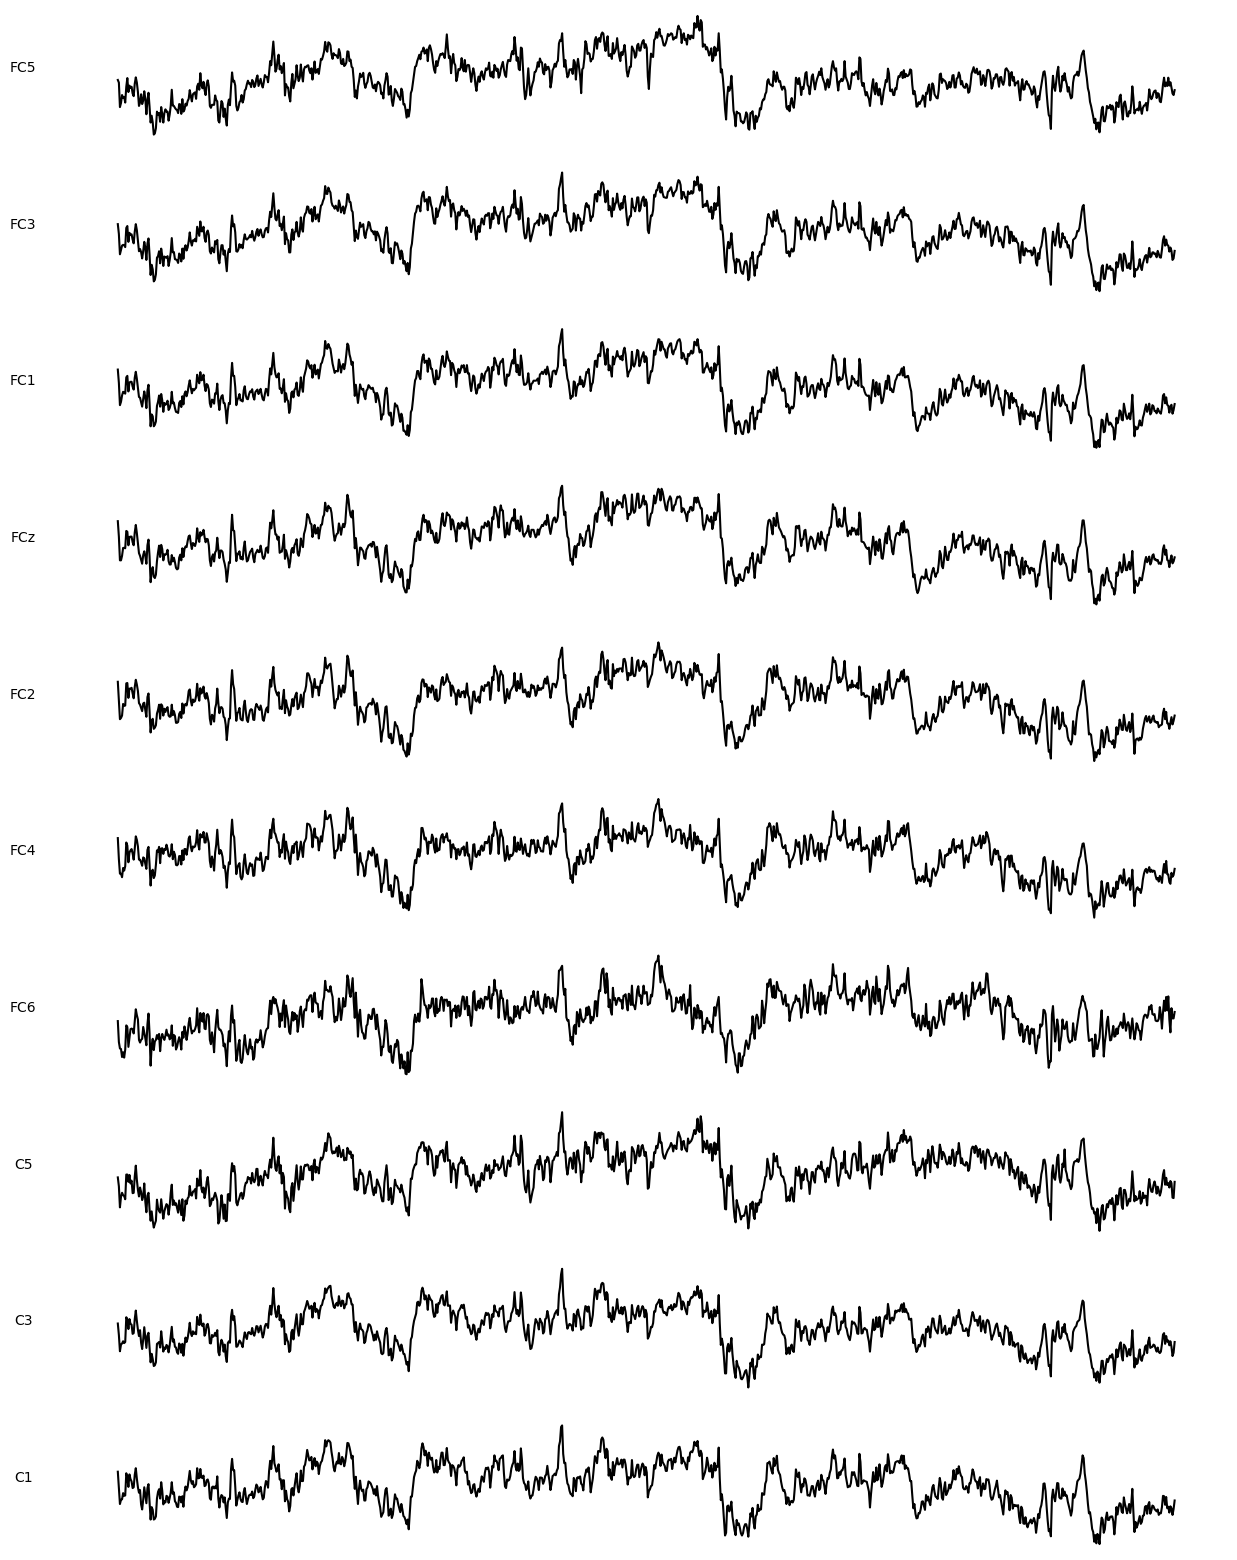

In [11]:
times_plt = times[:N_SAMPLES]
# plot_eeg(chs20_raw_df)
plot_eeg_with_time(chs20_raw_df, times_plt)

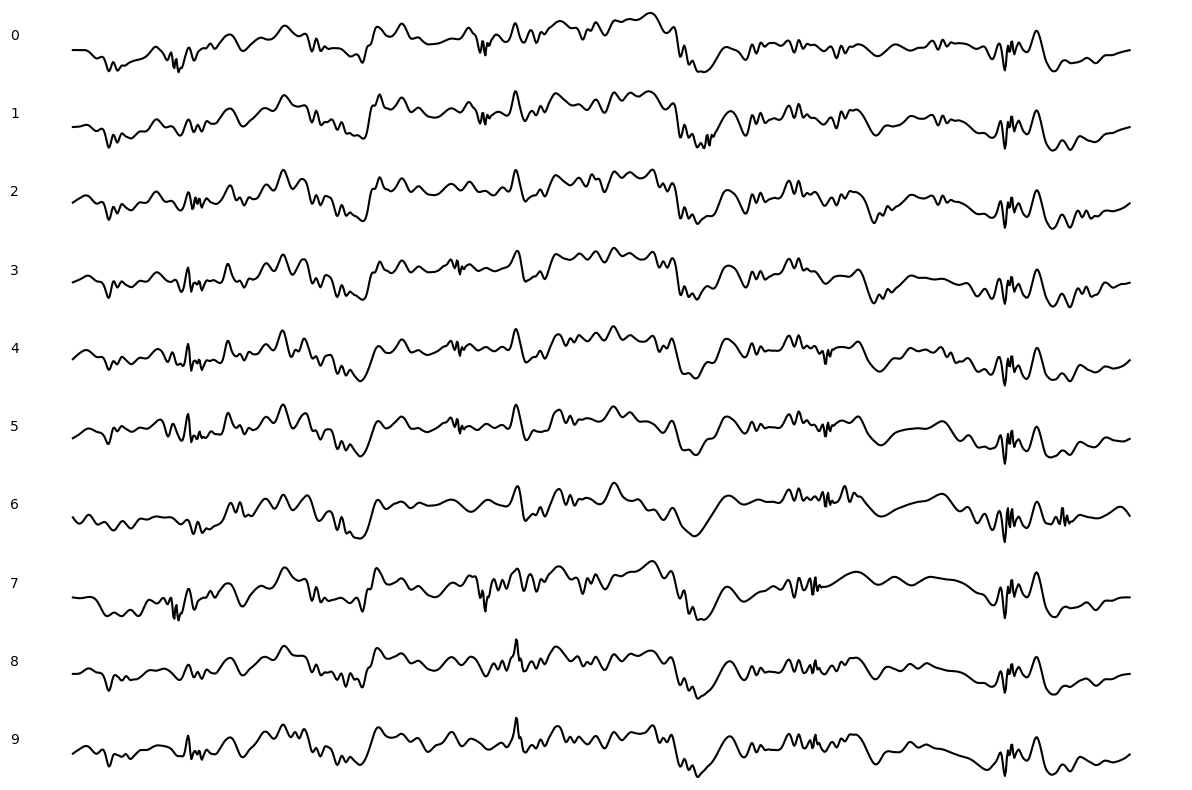

In [12]:
plot_eeg(chs20_denoised_df)

In [ ]:
def snr(raw, denoised):
    # Compute the signal power (denoised signal)
    signal_power = np.sum(denoised**2)
    
    # Compute the noise power (difference between raw and denoised signal)
    noise_power = np.sum((raw - denoised)**2)
    
    # Compute SNR
    return signal_power / noise_power

def rmse(raw, denoised):
    # Compute the RMSE between raw and denoised signals
    return np.sqrt(np.mean((raw - denoised)**2))

def pearson_correlation(raw, denoised):
    # Compute the Pearson correlation coefficient between raw and denoised signals
    return np.corrcoef(raw, denoised)[0, 1]

In [ ]:

rw = chs20_raw_df.to_numpy()[:,0]
dns = chs20_denoised[:,0]
print(snr(rw, dns))
print(rmse(rw, dns))
print(pearson_correlation(rw, dns))